In [1]:
# useful to autoreload the module without restarting the kernel
%load_ext autoreload
%autoreload 2

In [12]:
from mppi import Parsers as P

# Tutorial for YamboParser class

This tutorial describes the usage of the YamboParser class that parse the o- file produced by a yambo computation

In [3]:
filename = 'YamboParser_test/hf_results/o-hf_test1.hf'

In [120]:
import numpy as np

reference_column_names = {
    'hf' : ['kpoint','band','e0','ehf','dft','hf'],
    'qp' : ['kpoint','band','e0','eme0','sce0'],
    'carriers' : ['time','d(nhmne)','dnh','dne'],
    'spin_magnetization' : 
        ['time','Ms_x','Ms_y','Ms_z','Mv_x','Mv_y','Mv_z','Mc_x','Mc_y','Mc_z'],
    'external_field' : 
        ['time','E_x/Re','E_y/Re','E_z/Re','E_x/Im','E_y/Im','E_z/Im','Intensity','Fluence']
}

def file_to_list(filename,skip='#'):
    """
    Read the filename and append all the lines that do not start
    with skip to a list
    
    Args:
        filename(str) : name of the file
        skip(str) : first elements of the skipped lines
    """
    lines = []
    with open(filename) as f:
        for l in f:
            if not l.startswith(skip): lines.append(l)
    return lines

def get_columns(lines):
    """
    Split each line into a list and convert its elements to float.
    Then transpose the array so that each element of the array is a
    column of the data of the file.
    """
    splitted = []
    for l in lines: # run over lines
        splitted.append(list(map(float,l.split())))
    
    columns = np.array(splitted).transpose() 
    return columns 

def make_dict(filename,columns):
    """
    Create a dictionary from the columns array
    """
    suffix = filename.split('.')[-1]
    data = {}
    for ind,col in enumerate(columns):
        if suffix in reference_column_names:
            key = reference_column_names[suffix][ind]
        else:
            key = 'col'+str(ind+1)
        data[key] = col
    return data

In [107]:
lines = file_to_list(filename)
lines

['     1.00000      1.00000    -11.90291    -18.44185    -10.44030    -16.97925\n',
 '    1.000        2.000       -.1176E-4    -1.271       -11.31       -12.58   \n',
 '    1.000        3.000       -.1176E-4    -1.271       -11.31       -12.58   \n',
 '     1.00000      4.00000      0.00000     -1.27144    -11.30832    -12.57977\n',
 '    1.000000     5.000000     2.551225     6.921409    -9.992300    -5.622118\n',
 '    1.000000     6.000000     2.551230     6.921480    -9.992361    -5.622112\n',
 '    1.000000     7.000000     2.551230     6.921423    -9.992305    -5.622111\n',
 '     1.00000      8.00000      3.15207      8.11371    -10.79715     -5.83551\n',
 '     2.00000      1.00000    -11.10872    -17.31438    -10.51619    -16.72185\n',
 '     2.00000      2.00000     -3.91439     -6.58144    -10.63681    -13.30387\n',
 '     2.00000      3.00000     -0.75525     -2.21723    -11.07055    -12.53253\n',
 '     2.00000      4.00000     -0.75525     -2.21727    -11.07049    -12.53

In [108]:
columns = get_columns(lines)
columns[2]

array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
        2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152070e+00,
       -1.110872e+01, -3.914390e+00, -7.552500e-01, -7.552500e-01,
        1.962410e+00,  3.490390e+00,  3.490400e+00,  6.757970e+00])

In [110]:
data = make_dict(filename,columns)

In [111]:
data

{'kpoint': array([1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2., 2., 2., 2., 2.]),
 'band': array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.]),
 'e0': array([-1.190291e+01, -1.176000e-05, -1.176000e-05,  0.000000e+00,
         2.551225e+00,  2.551230e+00,  2.551230e+00,  3.152070e+00,
        -1.110872e+01, -3.914390e+00, -7.552500e-01, -7.552500e-01,
         1.962410e+00,  3.490390e+00,  3.490400e+00,  6.757970e+00]),
 'ehf': array([-18.44185 ,  -1.271   ,  -1.271   ,  -1.27144 ,   6.921409,
          6.92148 ,   6.921423,   8.11371 , -17.31438 ,  -6.58144 ,
         -2.21723 ,  -2.21727 ,   6.27255 ,   8.13828 ,   8.13826 ,
         12.2688  ]),
 'dft': array([-10.4403  , -11.31    , -11.31    , -11.30832 ,  -9.9923  ,
         -9.992361,  -9.992305, -10.79715 , -10.51619 , -10.63681 ,
        -11.07055 , -11.07049 , -10.02063 , -10.03632 , -10.03629 ,
        -10.40591 ]),
 'hf': array([-16.97925 , -12.58    , -12.58    , -12.57977 ,  -5.622118,
         -5.62

We can convert the dictionary into an object to have the attribute

In [116]:
from mppi.Utilities import Utils as U
#from mppi.Utilities.Utils import Dict_to_attribute

In [117]:
bla = U.Dict_to_attribute(**data)

In [118]:
bla.band

array([1., 2., 3., 4., 5., 6., 7., 8., 1., 2., 3., 4., 5., 6., 7., 8.])

In [95]:
import matplotlib.pyplot as plt

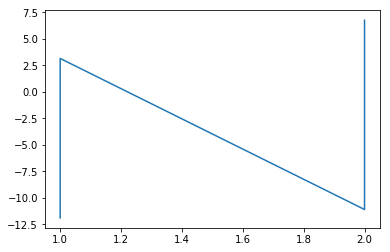

In [96]:
plt.plot(bla.col1,bla.col3)